## Generating 10 Points on the given condition

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns

In [185]:
def generate_10_points_with_gausian_noise():
    x_coordinates=np.linspace(start=-1,stop=1,num=10)
    y_coordinates=[]
    for x in x_coordinates:
        gaussian_error=np.random.normal(0,0.04)
        y=-0.3+0.5*x+gaussian_error
        y_coordinates.append(y)
    return x_coordinates,y_coordinates
def generate_10_points():
    x_coordinates=np.linspace(start=-1,stop=1,num=10)
    y_coordinates=[]
    for x in x_coordinates:
        y=-0.3+0.5*x
        y_coordinates.append(y)
    return x_coordinates,y_coordinates

In [189]:
x,y=generate_10_points_with_gausian_noise()
x_true,y_true=generate_10_points()

In [190]:
print(x)
print(y)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[-0.7869885266163692, -0.6480561056649884, -0.5395862423057026, -0.47007496060151455, -0.3131919633056752, -0.24160680441900223, -0.14246493244819738, -0.05024596746283291, 0.06101914200687686, 0.22578077687599363]


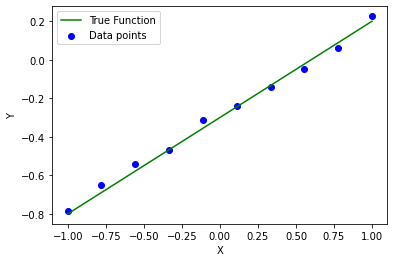

In [191]:
plt.scatter(x,y,color='blue',label='Data points')
plt.plot(x_true,y_true,color='green',label='True Function')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## Functions defined for further use

In [192]:
def gausian_function(x,mean,variance):
  mu=mean
  sigma=math.sqrt(variance)
  y=(1/(sigma*math.sqrt(2*np.pi)))*((np.exp([1])[0])**(-0.5*(((x-mu)/sigma)**2)))
  return y

In [193]:
def prior_grid_calc(w0_values,w1_values,mean,variance):
    prior_grid=np.zeros((len(w0_values),len(w0_values)))
    for i in range(len(w0_values)):
        for j in range(len(w1_values)):    
            w0_g = gausian_function(w0_values[i],mean,variance)
            w1_g = gausian_function(w1_values[j],mean,variance)
            prior_grid[i][j]=w0_g+w1_g
    return prior_grid

In [194]:
def likelihood_grid_calc(w0_values,w1_values,x,y):
    likelihood_grid=np.zeros((len(w0_values),len(w0_values)))
    for i in range(len(w0_values)):
        for j in range(len(w1_values)):    
              for k in range(len(x)):
                y=gausian_function(x[k],w0_values[i]+w1_values[j]*x[k],1)
                if(k==0):
                  likelihood_grid[i][j]=y
                else:
                  likelihood_grid[i][j]=likelihood_grid[i][j]*y
    return likelihood_grid

In [195]:
def posterior_grid_calc(prior_grid,likelihood_grid):
    posterior_grid=likelihood_grid @ prior_grid 
    return posterior_grid

##  Plotting the graphs

In [198]:
w0_values = np.array(np.linspace(-1,1,6));
w1_values = np.array(np.linspace(-1,1,6));

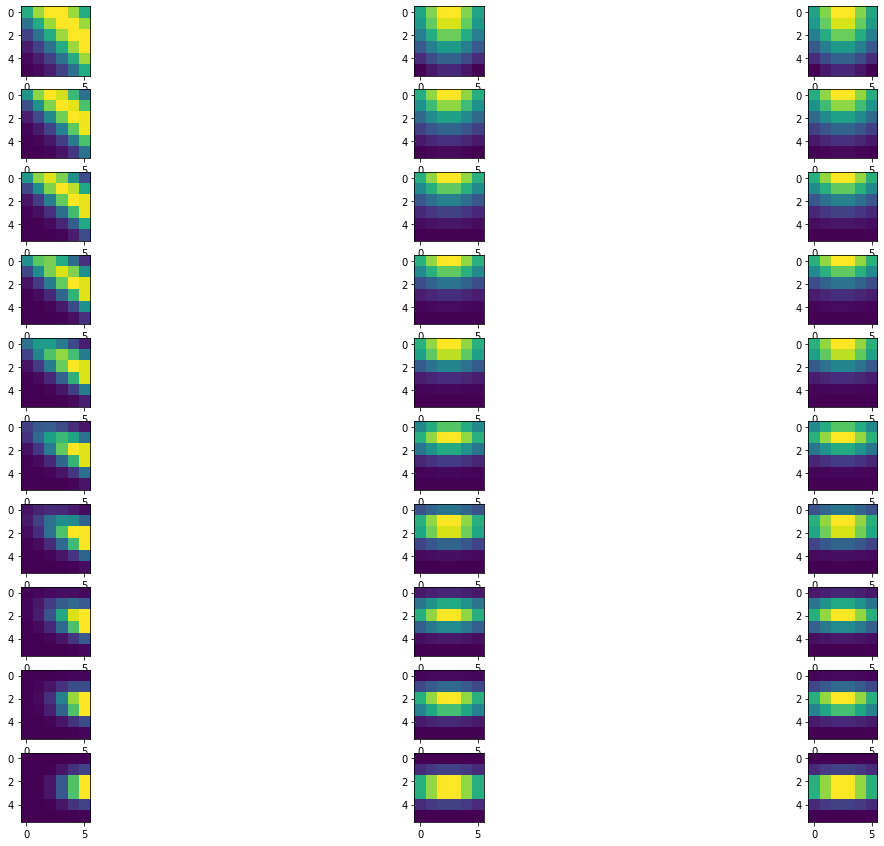

In [199]:
fig = plt.figure()
prior_grid=prior_grid_calc(w0_values,w1_values,0,0.5)
prior_grid
       
for i in range(len(x)):

    x_sub=x[:i+1]
    y_sub=y[:i+1]
    likelihood_grid=likelihood_grid_calc(w0_values,w1_values,x_sub,y_sub)
    posterior_grid=posterior_grid_calc(prior_grid,likelihood_grid)
    prior_grid=posterior_grid
    plt.subplot(10, 3, 3*i+1)
    plt.imshow(likelihood_grid)
    plt.subplot(10, 3, 3*i+2)
    plt.imshow(prior_grid)
    plt.subplot(10, 3, 3*i+3)
    plt.imshow(posterior_grid)
plt.gcf().set_size_inches(20,15)